## Install library

In [1]:
%pip install opencv_python
%pip install matplotlib
## nếu cài trên linux bị lỗi ko import liên quan đến việc thiếu thư viện libGL.so.1, một thư viện cần thiết để OpenCV hoạt động thì có thể thử cách sau.
# sudo apt-get update
# sudo apt-get install libgl1-mesa-glx

  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.5 MB 975.2 kB/s eta 0:00:16
   ---------------------------------------- 0.1/15.5 MB 1.1 MB/s eta 0:00:15
    --------------------------------------- 0.3/15.5 MB 1.4 MB/s eta 0:00:11
    --------------------------------------- 0.3/15.5 MB 1.5 MB/s eta 0:00:11
    --------------------------------------- 0.3/15.5 MB 1.1 MB/s eta 0:00:14
    --------------------------------------- 0.3/15.5 MB 1.1 MB/s eta 0:00:14
    --------------------------------------- 0.4/15.5 MB 1.1 MB/s eta 0:00:14
   - -------------------------------------- 0.4/15.5 MB 969.0 kB/s eta 0:00:16
   - ---------------

## Import Library

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt

## Increate brightness

In [25]:
data = np.array([-4, 3, 8, 300, 7])
print(data)

#clip với các tham số đầu tiên theo kiểu np.array , tham số thứ hai là cận dưới nếu giá trị vé hơn cận dưới sẽ thay bằng cận dưới tương tự với cận trên, cái này hình như giống ngoại lại của boxplot lúc cần xử lý
data = np.clip(data, 0, 255)
print(data)

[ -4   3   8 300   7]
[  0   3   8 255   7]


In [26]:
data = np.array([-4., 3, 8, 300, 7])
print(data)
print(data.dtype)

# where su dun de duy tung phan tu trong data neu ma dk o tham so 1 dung thi se in ra tham so 2 nguoc lai in ra tham so 3
data = np.where(data > 0, 0, data)
print(data)

data = np.where(data > 255, 255, data)
print(data)

[ -4.   3.   8. 300.   7.]
float64
[-4.  0.  0.  0.  0.]
[-4.  0.  0.  0.  0.]


In [27]:
#imread 0 dọc ảnh grayscale, 1 đọc ảnh màu.
img = cv2.imread('nature.png', 1)
# convert np.array từ unit8 ra float64 để tính toán đỡ sai số hơn.
img = img.astype(float)

img += 50
# nếu vượt qua 255 thì các giá trị sẽ chạy lại từ 0 vì tràn bit nên là phải có giới hạn hong sẽ bị lỗi.
img = np.clip(img, 0, 255)

# trong py gốc ko có uint8 vậy nên phải gọi uint8 từ trong numpy
img = img.astype(np.uint8)
cv2.imwrite('increase50_clip.png', img)


True

## Decrease brightness
Tương tự thay vì + thì chúng ta trừ.

In [28]:
img = cv2.imread('image.jpg', 1)
heigh, width, chanel = img.shape

# Đối với ảnh để imread là 1 thì ảnh đang ở chế độ đọc có màu nên là sẽ có 3 lớp lần lược BRG và shape tương ứng (height, width, channel) riêng với 0 là anh đơn sắc sẽ ko có kênh channel

x_0 , y_0 = 470, 120
x_1, y_1 = 800, 850

region = img[y_0:y_1, x_0:x_1,:]
cv2.imwrite('output_region.png', region)

True

### Drawing a bounding box

In [29]:

img1 = cv2.imread('image.jpg', 1)
heigh, width, chanel = img1.shape

# Đối với ảnh để imread là 1 thì ảnh đang ở chế độ đọc có màu nên là sẽ có 3 lớp lần lược BRG và shape tương ứng (height, width, channel) riêng với 0 là anh đơn sắc sẽ ko có kênh channel

x_0 , y_0 = 470, 120
x_1, y_1 = 800, 850

color = np.array([0, 0, 255])

img1[y_0 : y_0 + 5, x_0: x_1, : ] = color
img1[y_1: y_1 + 5, x_0: x_1, : ] = color
img1[y_0:y_1 + 5, x_0 : x_0 + 5, : ] = color
img1[y_0:y_1 + 5, x_1 : x_1 + 5, : ] = color
cv2.imwrite('output_regionmau.jpg', img1)

True

### Convert Color Image to Grayscale

Image Color


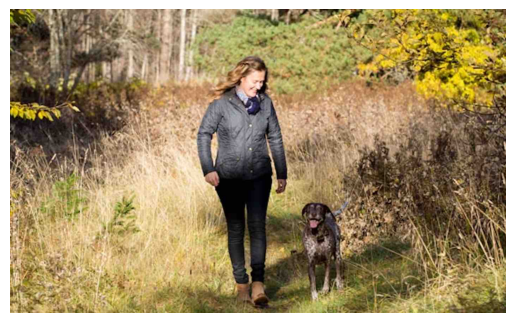

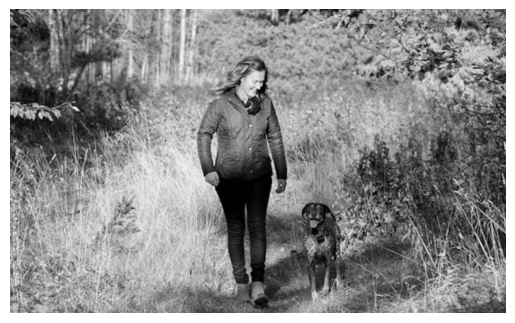

In [30]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
#load color image (channel order : BGR)
color_image = cv2.imread('image.jpg', 1)
print("Image Color")
data1 = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB )
plt.imshow(data1)
plt.axis("off")
plt.show()

#conversion vector [B, G, R]
vector = np.array([0.072, 0.715, 0.213])

grayscale_image = color_image@vector
grayscale_image = grayscale_image.astype(np.uint8)
grayscale_image = cv2.cvtColor(grayscale_image, cv2.COLOR_BGR2RGB )

# data1 = cv2.cvtColor(grayscale_image, cv2.COLOR_BGR2RGB )
plt.imshow(grayscale_image)
plt.axis("off")
plt.show()

### if else using matrix

In [31]:
import math
import numpy as np

def function_6(a,b):
  vector_v = np.array([0,0,0])
  vector_v[a] = 1

  vector_u = np.array([b*b, math.sqrt(b), b])

  result = np.dot(vector_v, vector_u)
  return int(result)

print(function_6(0, 4))
print(function_6(1, 4))
print(function_6(2, 4))


16
2
4


### Flip image vertically using matrix

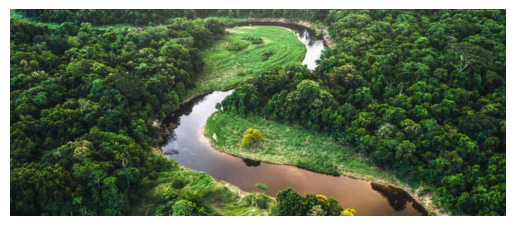

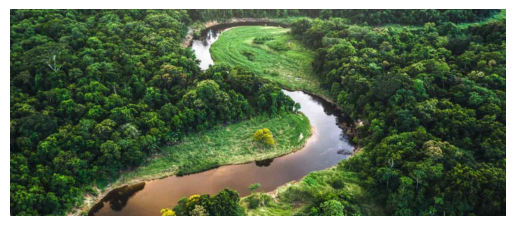

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('nature.png', 1)
output1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB )
plt.imshow(output1)
plt.axis("off")
plt.show()

height, width, depth = img.shape

transform = np.array([[-1, 0], 
                      [0, 1]])

output = np.zeros((height, width, depth), np.uint8)
for i in range(height):
    for j in range(width):
        pixel = img[i, j, :]
        new_j, new_i = transform.dot(np.array([j, i])) + np.array([width - 1, 0])
        new_j = int(new_j)
        new_i = int(new_i)
        output[new_i, new_j, :] = pixel
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB )

plt.imshow(output)
plt.axis("off")
plt.show()